In [ ]:
import matplotlib.pyplot as plt
import fastf1.plotting

In [2]:
venue = input("Enter the race venue (eg: British Grand Prix)")
type = input("Enter The session Type (eg: Race)")

In [4]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1')
session=fastf1.get_session(2025, venue, type)
session.load()
session

core           INFO 	Loading data for United States Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '16', '44', '81', '63', '22', '27', '87', '14', '30', '18', '12', '23', '31', '6', '43', '5', '10', '55']


2025 Season Round 19: United States Grand Prix - Race

In [5]:
person1 = input("Enter the first three intials of the driver (eg: for Hamilton -> 'HAM')")
person2 = input("Enter the first three intials of the driver (eg: for Hamilton -> 'HAM')")

In [12]:
per1_lap = session.laps.pick_drivers(person1).pick_fastest()
per2_lap = session.laps.pick_drivers(person2).pick_fastest()

In [15]:
per1_tel = per1_lap.get_car_data().add_distance()
per2_tel = per2_lap.get_car_data().add_distance()

In [16]:
t1_color = fastf1.plotting.get_team_color(per1_lap['Team'], session=session)
t2_color = fastf1.plotting.get_team_color(per2_lap['Team'], session=session)

Text(0.5, 0.98, 'Fastest Lap Comparison\nUnited States Grand Prix 2025 Race')

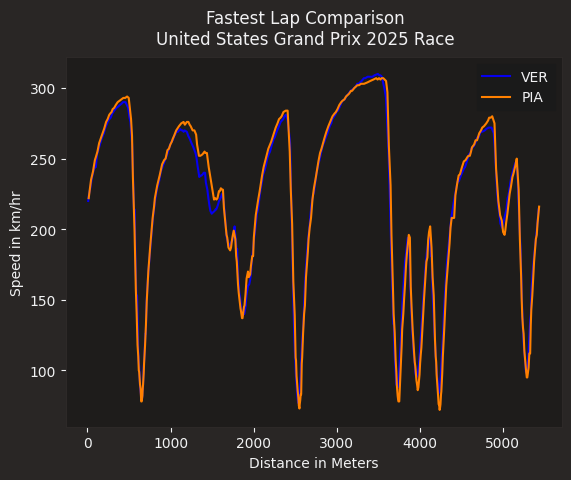

In [17]:
fig, ax=plt.subplots()

ax.plot(per1_tel['Distance'],per1_tel['Speed'],color=t1_color, label=person1)
ax.plot(per2_tel['Distance'],per2_tel['Speed'],color=t2_color, label=person2)

ax.set_xlabel('Distance in Meters')
ax.set_ylabel('Speed in km/hr')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison\n"
             f"{session.event['EventName']} {session.event.year} {session.event['Session5']}")